In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
#importing the dataset
X, y = datasets.load_diabetes(as_frame=True, scaled=False, return_X_y=True)
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0


Here AS_FRAME = True means that the data is returned as a pandas dataframe if FALSE it would have returned data to numpy and
SCALED = True means that the data is scaled

In [4]:
#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1. MULTIVARIATE LINEAR REGRESSION

In [67]:
# Multivariate Linear Regression Model (lr)
mv_lr = LinearRegression()
mv_lr.fit(X_train, y_train)
y_pred_lr = mv_lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mape_lr = np.mean(np.abs((y_test - y_pred_lr) / y_test)) * 100
print("Multivariate Linear Regression MAE:", mae_lr)
print("Multivariate Linear Regression R2:", r2_lr)
print("Multivariate Linear Regression MAPE:", mape_lr)


Multivariate Linear Regression MAE: 42.79409467959994
Multivariate Linear Regression R2: 0.4526027629719197
Multivariate Linear Regression MAPE: 37.49982636756112


2. POLYNOMIAL LINEAR REGRESSION OF 2 DEGREE ON BMI ALONE

In [66]:
# Polynomial Regression on BMI (2nd degree) (pr)
bmi_feature_index = 2
X_bmi = X_train[:, [bmi_feature_index]]
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_bmi)
lr_poly = LinearRegression()
lr_poly.fit(X_poly, y_train)
X_test_poly = poly.transform(X_test[:, [bmi_feature_index]])
y_pred_poly = lr_poly.predict(X_test_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
mape_poly = calculate_mape(y_test, y_pred_poly)

print("Polynomial Regression on BMI (2nd degree) MAE:", mae_poly)
print("Polynomial Regression on BMI (2nd degree) R2:", r2_poly)
print("Polynomial Regression on BMI (2nd degree) MAPE:", mape_poly)

feature_poly = poly.get_feature_names_out()
feature_poly.shape

Polynomial Regression on BMI (2nd degree) MAE: 52.38391176015265
Polynomial Regression on BMI (2nd degree) R2: 0.2289715971205667
Polynomial Regression on BMI (2nd degree) MAPE: 45.99695581375561


(3,)

3. MULTIVARIATE POLYNOMIAL REGRESSION OF 2 DEGREE on ALL VARIABLES

In [65]:
# Polynomial Regression with degree 2 (poly)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_pr = poly.fit_transform(X_train)
X_test_pr = poly.fit_transform(X_test)
poly_lr = LinearRegression()
poly_lr.fit(X_train_pr, y_train)
y_pred_pr = poly_lr.predict(X_test_pr)
mae_pr = mean_absolute_error(y_test, y_pred_pr)
r2_pr = r2_score(y_test, y_pred_pr)
mape_pr = np.mean(np.abs((y_test - y_pred_pr) / y_test)) * 100
print("Polynomial Regression MAE:", mae_pr)
print("Polynomial Regression R2:", r2_pr)
print("Polynomial Regression MAPE:", mape_pr)

feature_pr = poly.get_feature_names_out()
feature_pr.shape

Polynomial Regression MAE: 43.581693254652535
Polynomial Regression R2: 0.4156399336408
Polynomial Regression MAPE: 38.28567851400161


(65,)

COMPARISON AND VISUALIZATION OF MODELS ON BASIS OF MAE, MAPE and R-SQUARED VALUES

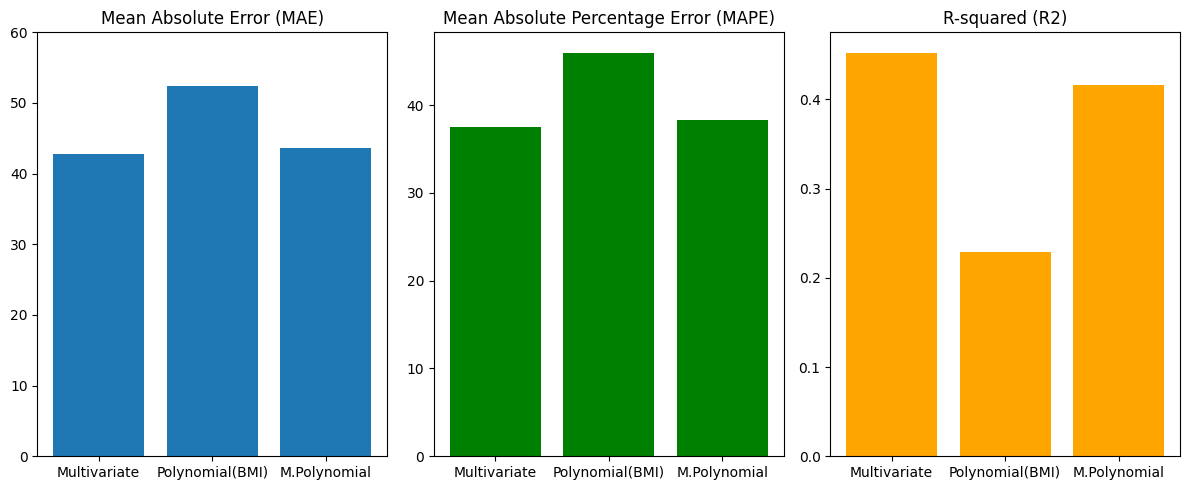

In [56]:
# Create bar plots for MAE, MAPE, and R-squared for each model
models = ["Multivariate", "Polynomial(BMI)", "M.Polynomial"]
mae_values = [mae_lr, mae_poly, mae_pr]
mape_values = [mape_lr, mape_poly, mape_pr]
r2_values = [r2_lr, r2_poly, r2_pr]

plt.figure(figsize=(12, 5))

# MSE
plt.subplot(131)
plt.bar(models, mae_values)
plt.ylim(0, 60)
plt.title("Mean Absolute Error (MAE)")

# MAPE
plt.subplot(132)
plt.bar(models, mape_values, color="green")
plt.title("Mean Absolute Percentage Error (MAPE)")

# R-squared
plt.subplot(133)
plt.bar(models, r2_values, color="orange")
plt.title("R-squared (R2)")

plt.tight_layout()
plt.show()

Model is said to be better if it has Lower values in MAE and MAPE also Consequently will have its R-Square value closer to 1.
Comparing Values from above 3 models it is clear that Multivariate Linear Regression Model is the better fit then the other two models. However it can also be observed that there is not much difference between values of Multivariate Linear Regresiion model and Multivariate Polynomial model on all the variables.

(i) The number of Parameters we are fitting in the Linear Regresiion Model is 2. 
    In Polynomial Linear Regression of Degree 2 on BMI alone are 3.
    Whereas In Polynomial Regression With degree 2 on all variables number of Parameters are 65

(ii) From the Statistical data above it is clear that Mulativariate Linear Regression Model be applied to get better output and precision.